# Cleaning and EDA

Performing basic cleaning and exploratory data analysis on the kaggle Titanic training set.

Competition information here: https://www.kaggle.com/c/titanic

### Imports and data upload

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

Upload the data

In [2]:
training_data = pd.read_csv('../data/train.csv')

In [3]:
test_data = pd.read_csv('../data/test.csv')

## Data Exploration

In [4]:
training_data.shape

(891, 12)

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are null values for age, and cabin. Will first compute values for age, since there are not many.  Look at correlations to try and determine what to use to predict age.

In [7]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Observe column by column what each value is and if there's anything we can extract from the column

In [9]:
training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### PassengerID

In [10]:
training_data['PassengerId'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

#### Survived

In [11]:
training_data['Survived'].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Want to look at the class imbalance for the survive column.

In [12]:
training_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Not terrible, will not try to tamper with the classes yet.

#### Pclass: a socioeconomic proxy.

In [13]:
training_data['Pclass'].head(5)

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [14]:
training_data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

#### Name

In [15]:
training_data['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### Age

In [16]:
training_data['Age'].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Look at distribution of ages.

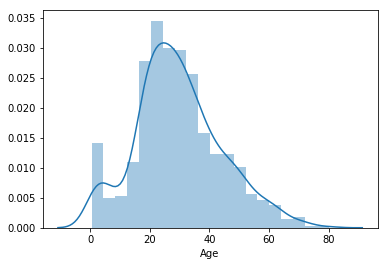

In [17]:
sns.distplot(training_data['Age'].dropna())

#### SibSp: Family relations

SipSp = # siblings / # spouses aboard the ship.

In [18]:
training_data['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

#### Parch: Family relations

Parch = # parents / # children abord the ship

In [19]:
training_data['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

#### Ticket

In [20]:
training_data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Not sure what the acronyms mean.

#### Fare

In [21]:
training_data['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

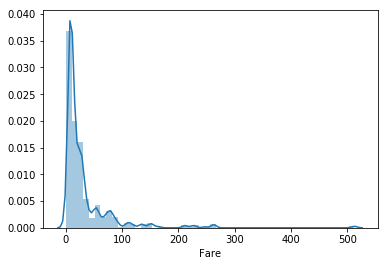

In [22]:
sns.distplot(training_data['Fare'])

#### Cabin

In [23]:
training_data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [24]:
training_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

#### Embarked

In [25]:
training_data['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

## Basic Data Cleaning

Copy original data, so there is always a set of the original columns to fall back on.

In [77]:
training_data_cleaned = training_data.copy()

In [78]:
test_data_cleaned = test_data.copy()

#### Embarkation

Going to make a set of dummy variables for the embarkation.

In [79]:
def clean_embarkation(df):
    """
    Clean the embarkation variable. Will make dummies and drop the var.
    
    inputs: the dataframe
    output: the dataframe with 2 embarkation dummy columns.
    """
    df_dummies =  pd.get_dummies(df['Embarked'])
    df_dummies.columns = ['Embarked_' + c for c in df_dummies.columns.values]
    df = pd.concat([df, df_dummies], axis=1)
    df.drop(['Embarked', 'Embarked_Q'], axis=1, inplace=True)
    
    return df

In [80]:
training_data_cleaned = clean_embarkation(training_data_cleaned)

In [81]:
test_data_cleaned = clean_embarkation(test_data_cleaned)

In [82]:
training_data_cleaned.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


#### Sex

Convert sex to 1's and 0's so that everything is numeric.

In [83]:
training_data_cleaned.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [84]:
training_data_cleaned['Sex'] = training_data_cleaned['Sex'].map({'female': 0, 'male': 1})

In [85]:
test_data_cleaned['Sex'] = test_data_cleaned['Sex'].map({'female': 0, 'male': 1})

In [86]:
training_data_cleaned.Sex.value_counts(normalize=True)

1    0.647587
0    0.352413
Name: Sex, dtype: float64

#### Age

Look at what basic variables are correlated with age. The goal is to eliminate the NA age vars.

In [87]:
training_data_cleaned.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_S'],
      dtype='object')

In [88]:
training_data_drop_cabin = training_data_cleaned.drop('Cabin', axis=1)

Get the non-estimated age

In [89]:
training_data_non_estimated_age = training_data_drop_cabin.loc[
    training_data_drop_cabin.Age.round() == training_data_drop_cabin.Age, :
]   

In [90]:
training_data_non_estimated_age.shape

(689, 12)

In [91]:
age_groups = training_data_non_estimated_age.dropna().groupby(
    ['Sex', 'Pclass', 'SibSp', 'Parch']
).agg({'Age': ['min', 'median', 'max', 'std', 'mean']})

Do a random age assignment.  The goal is to take into account the distribution over age for each null person.

In [92]:
p = training_data_cleaned.loc[training_data.Age.isnull(), :].iloc[0]

In [93]:
df = training_data_non_estimated_age

In [94]:
# Filter to the sex, pclass, sibsp, and parch of this person
filtered_df = df.loc[
    (df.Sex == p.loc['Sex']) & (df.Pclass == p.loc['Pclass']) & (df.SibSp == p.loc['SibSp']) & (df.Parch == p.loc['Parch'])
]

In [95]:
filtered_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,0,1
37,38,0,3,"Cann, Mr. Ernest Charles",1,21.0,0,0,A./5. 2152,8.0500,0,1
51,52,0,3,"Nosworthy, Mr. Richard Cater",1,21.0,0,0,A/4. 39886,7.8000,0,1
60,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,1,0


In [96]:
age = list(filtered_df['Age'].values)
age.sort()

In [97]:
random_age = np.random.choice(age, size=1)[0]

In [98]:
random_age

22.0

Function to randomly assign age

In [99]:
def get_age(person, age_df):
    """
    Assign an age to a person using their sex, pclass, sibsp, and parch.
    
    input: the series of the person to assign the age, the dataframe with ages to choose from
    output: the age
    """
    filtered_age_df = age_df.loc[
        (age_df.Sex == person.loc['Sex']) & 
        (age_df.Pclass == person.loc['Pclass']) & 
        (age_df.SibSp == person.loc['SibSp']) & 
        (age_df.Parch == person.loc['Parch'])
    ]
    age_list = list(filtered_age_df['Age'].values)
    
    # If no one in age list, group by sex and pclass
    if len(age_list) == 0:
        filtered_age_df = age_df.loc[
            (age_df.Sex == person.loc['Sex']) & (age_df.Pclass == person.loc['Pclass']), :
        ]
        age_list = list(filtered_age_df['Age'].values)
    
    rand_age = np.random.choice(age_list, size=1)[0]
    
    return rand_age

For training data

In [100]:
for i in training_data_cleaned.loc[training_data.Age.isnull(), :].index.values:
    print(i)
    training_data_cleaned.loc[i, 'Age'] = get_age(training_data_cleaned.loc[i, :], training_data_non_estimated_age)

5
17
19
26
28
29
31
32
36
42
45
46
47
48
55
64
65
76
77
82
87
95
101
107
109
121
126
128
140
154
158
159
166
168
176
180
181
185
186
196
198
201
214
223
229
235
240
241
250
256
260
264
270
274
277
284
295
298
300
301
303
304
306
324
330
334
335
347
351
354
358
359
364
367
368
375
384
388
409
410
411
413
415
420
425
428
431
444
451
454
457
459
464
466
468
470
475
481
485
490
495
497
502
507
511
517
522
524
527
531
533
538
547
552
557
560
563
564
568
573
578
584
589
593
596
598
601
602
611
612
613
629
633
639
643
648
650
653
656
667
669
674
680
692
697
709
711
718
727
732
738
739
740
760
766
768
773
776
778
783
790
792
793
815
825
826
828
832
837
839
846
849
859
863
868
878
888


For testing data

In [101]:
for i in test_data_cleaned.loc[test_data_cleaned.Age.isnull(), :].index.values:
    print(i)
    test_data_cleaned.loc[i, 'Age'] = get_age(test_data_cleaned.loc[i, :], training_data_non_estimated_age)

10
22
29
33
36
39
41
47
54
58
65
76
83
84
85
88
91
93
102
107
108
111
116
121
124
127
132
133
146
148
151
160
163
168
170
173
183
188
191
199
200
205
211
216
219
225
227
233
243
244
249
255
256
265
266
267
268
271
273
274
282
286
288
289
290
292
297
301
304
312
332
339
342
344
357
358
365
366
380
382
384
408
410
413
416
417


In [102]:
training_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked_C     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 78.4+ KB


In [103]:
test_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked_C     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(2)
memory usage: 33.6+ KB


#### Drop columns and rows we do not want for now

In [104]:
training_data_cleaned.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [105]:
training_data_cleaned.drop(
    ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True
)

In [106]:
test_data_cleaned.drop(
    ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True
)

There is one row in the passenger ID that has no fare in the test set

In [107]:
test_data_cleaned.dropna(inplace=True)

In [108]:
training_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.5 KB


In [109]:
test_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
Pclass        417 non-null int64
Sex           417 non-null int64
Age           417 non-null float64
SibSp         417 non-null int64
Parch         417 non-null int64
Fare          417 non-null float64
Embarked_C    417 non-null uint8
Embarked_S    417 non-null uint8
dtypes: float64(2), int64(4), uint8(2)
memory usage: 23.6 KB


### Outlier filtering

Look at the outliers for the numerical columns, age and fare.

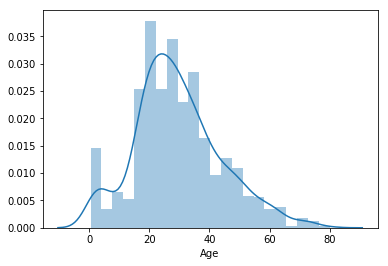

In [110]:
sns.distplot(training_data_cleaned['Age'])

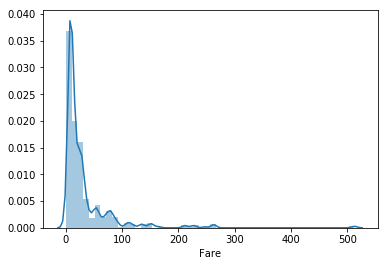

In [111]:
sns.distplot(training_data_cleaned['Fare'])

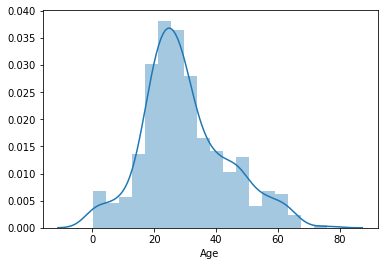

In [112]:
sns.distplot(test_data_cleaned['Age'])

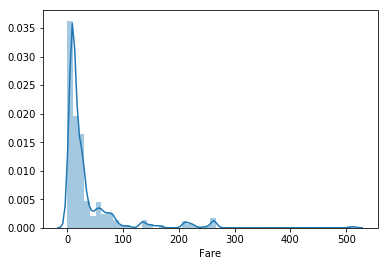

In [113]:
sns.distplot(test_data_cleaned['Fare'])

Age looks ok, but fare needs to be trimmed.

In [114]:
mean_fare = training_data['Fare'].mean()
std_fare = training_data_cleaned['Fare'].std()

Look at data points above different stds of the mean

In [115]:
(training_data_cleaned.Fare >= (mean_fare + 1*std_fare)).sum()

73

In [116]:
(training_data_cleaned.Fare >= (mean_fare + 2*std_fare)).sum()

38

In [117]:
(training_data_cleaned.Fare >= (mean_fare + 3*std_fare)).sum()

20

In [118]:
(training_data_cleaned.Fare >= (mean_fare + 4*std_fare)).sum()

11

In [119]:
(test_data_cleaned.Fare >= (mean_fare + 1*std_fare)).sum()

39

In [120]:
(test_data_cleaned.Fare >= (mean_fare + 2*std_fare)).sum()

29

In [121]:
(test_data_cleaned.Fare >= (mean_fare + 3*std_fare)).sum()

18

In [122]:
(test_data_cleaned.Fare >= (mean_fare + 4*std_fare)).sum()

9

Looks like we get an increase in two, so will take the training data two std value and cap above that.  Going to drop the things that are >= 2 std's above the mean.

In [123]:
two_stds = mean_fare + 2*std_fare

In [124]:
training_data_cleaned = training_data_cleaned.loc[training_data_cleaned.Fare <= two_stds, :]

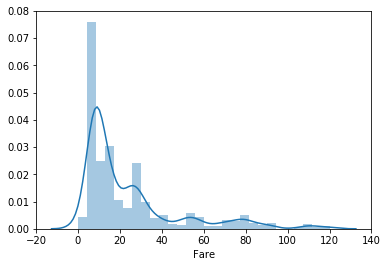

In [125]:
sns.distplot(training_data_cleaned.Fare)

In [75]:
test_data_cleaned.loc[test_data_cleaned.Fare > two_stds, 'Fare'] = two_stds

In [126]:
test_data_cleaned = test_data_cleaned.loc[test_data_cleaned.Fare <= two_stds, :]

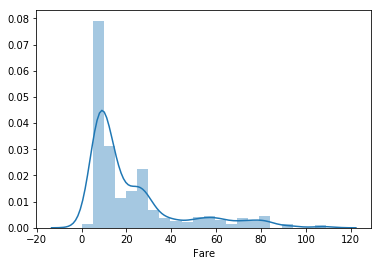

In [127]:
sns.distplot(test_data_cleaned.Fare)

## Feature extraction

Going to look at correlations within the training data.

In [128]:
corr_matrix = np.corrcoef(training_data_cleaned.as_matrix())

In [129]:
corr_matrix = training_data_cleaned.corr()

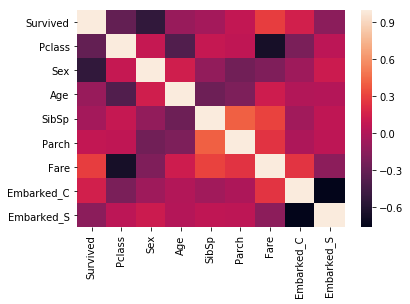

In [130]:
sns.heatmap(
    corr_matrix, 
    fmt='.2f',
)

#### Look at features impact on survival rate

Going to look at summary statistics for each variable, which would be, due to variable types:

1. The distribution of PClass per survival columns
2. The distribution of sex per survival columns
3. The average number of SibSp
4. The average number of Parch
5. The average fare
6. The average age
7. The distribution of embarked C
8. The distribution of embarked S

### Distributions

Pclass

In [170]:
pclass_split = pd.crosstab(training_data_cleaned.Survived, training_data_cleaned.Pclass, normalize='columns')

In [171]:
pclass_split.index.name = None

In [172]:
pclass_split.columns.name = None

In [173]:
pclass_split.columns = [str(i) + '_PClass' for i in pclass_split.columns.values]

In [174]:
pclass_split

,1_PClass,2_PClass,3_PClass
0,0.393258,0.527174,0.757637
1,0.606742,0.472826,0.242363


Sex

In [175]:
sex_split = pd.crosstab(training_data_cleaned.Survived, training_data_cleaned.Sex, normalize='columns')
sex_split.index.name = None
sex_split.columns.name = None
sex_split.columns = [str(i) + '_Sex' for i in sex_split.columns.values]

In [176]:
sex_split

,0_Sex,1_Sex
0,0.274306,0.814159
1,0.725694,0.185841


Embarked_C

In [177]:
embarked_c_split = pd.crosstab(training_data_cleaned.Survived, training_data_cleaned.Embarked_C, normalize='columns')
embarked_c_split.index.name = None
embarked_c_split.columns.name = None
embarked_c_split.columns = [str(i) + '_Embarked_C' for i in embarked_c_split.columns.values]

In [178]:
embarked_c_split

,0_Embarked_C,1_Embarked_C
0,0.665718,0.473333
1,0.334282,0.526667


Embarked_S

In [179]:
embarked_s_split = pd.crosstab(training_data_cleaned.Survived, training_data_cleaned.Embarked_S, normalize='columns')
embarked_s_split.index.name = None
embarked_s_split.columns.name = None
embarked_s_split.columns = [str(i) + '_Embarked_S' for i in embarked_s_split.columns.values]

In [180]:
embarked_s_split

,0_Embarked_S,1_Embarked_S
0,0.515284,0.674679
1,0.484716,0.325321


### Mean values: Sibsp/Pqarch/Fare

In [181]:
mean_values = training_data_cleaned.groupby(
    ['Survived'], as_index=False
)['SibSp', 'Parch', 'Fare', 'Age'].mean()

In [182]:
mean_values.index = mean_values.Survived.values
mean_values.index.name = None
mean_values.drop('Survived', axis=1, inplace=True)

In [183]:
mean_values

,SibSp,Parch,Fare,Age
0,0.552876,0.309833,18.768458,30.368275
1,0.458599,0.445860,32.990500,27.680732


### Concatenate

In [184]:
summary_stats_per_class = pd.concat([
    pclass_split,
    sex_split,
    embarked_c_split,
    embarked_s_split,
    mean_values
    
], axis=1)

In [185]:
summary_stats_per_class

,1_PClass,2_PClass,3_PClass,0_Sex,1_Sex,0_Embarked_C,1_Embarked_C,0_Embarked_S,1_Embarked_S,SibSp,Parch,Fare,Age
0,0.393258,0.527174,0.757637,0.274306,0.814159,0.665718,0.473333,0.515284,0.674679,0.552876,0.309833,18.768458,30.368275
1,0.606742,0.472826,0.242363,0.725694,0.185841,0.334282,0.526667,0.484716,0.325321,0.458599,0.445860,32.990500,27.680732


There are not a ton of features, so going to let the GridSearchCV library take care of what's important.  It is interesting to note that...

* Class definitely matters
* Having more children matters
* Being female makes you more likely to survive
* Higher fare matters (i.e. likely correlates with class, from heatmap)
* Being younger matters (more likely to get a lifeboat I'm assuming)

The only things which do not seem to have a large impact are where a person embarks.

## Save

In [186]:
training_data_cleaned.to_csv('../data/train_cleaned_v1_02110218.csv', index=False)
test_data_cleaned.to_csv('../data/test_cleaned_v1_02112018.csv', index=False)